trainingset (346, 8)
testset (54, 8)
PAYEDOFF , COLLECTION [1 2]


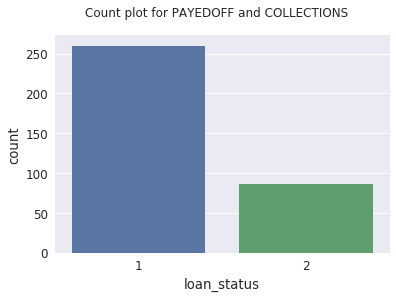

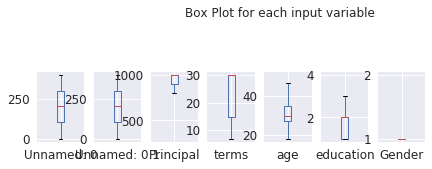

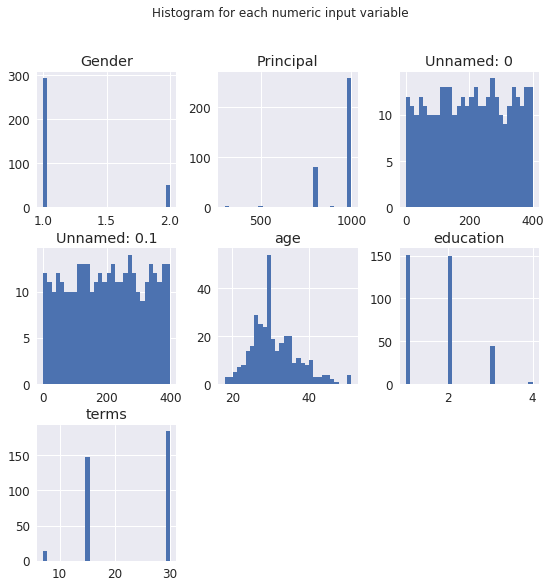

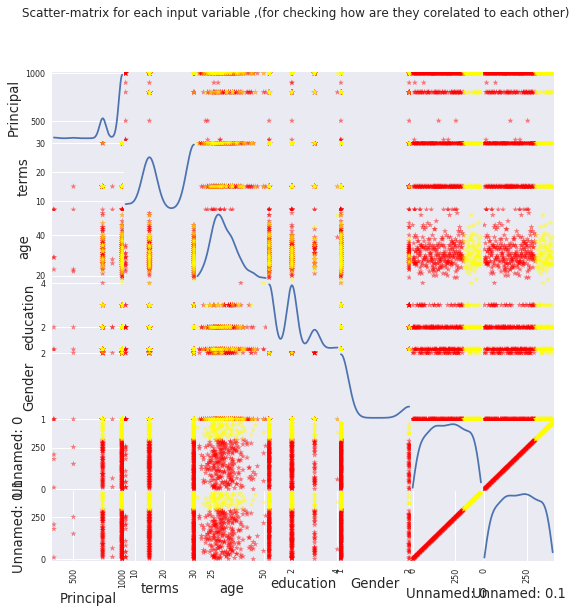

Accuracy of Logistic regression classifier on trainingset: 0.95
Accuracy of Logistic regression classifier on testset: 0.99
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 1.00
Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.84
Confusion Matrix: [[73  0]
 [ 0 14]]
Classification Report:              precision    recall  f1-score   support

          1       1.00      1.00      1.00        73
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        87

Classification Accuracy: 1.0
Jaccard Score: 1.0
Logloss: 0.0736492501356


In [4]:
import warnings
from warnings import simplefilter
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import sklearn
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from matplotlib import cm
import seaborn as sns;sns.set(font_scale=1.2)
from sklearn import preprocessing ,  neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
%matplotlib inline


testset = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
trainingset=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')

simplefilter(action='ignore', category=FutureWarning)
testset.drop(['effective_date','due_date',],1, inplace=True)
trainingset.drop(['effective_date','due_date',],1, inplace=True)

trainingset.replace('male',1 ,inplace=True)
trainingset.replace('female',2 ,inplace=True)
testset.replace('male',1 ,inplace=True)
testset.replace('female',2 ,inplace=True)

trainingset.replace('High School or Below',1 ,inplace=True)
trainingset.replace('college',2,inplace=True)
trainingset.replace('Bechalor',3 ,inplace=True)
trainingset.replace('Master or Above',4 ,inplace=True)
testset.replace('High School or Below',1 ,inplace=True)
testset.replace('college',2,inplace=True)
testset.replace('Bechalor',3 ,inplace=True)
testset.replace('Master or Above',4 ,inplace=True)

testset.replace('PAIDOFF',1 ,inplace=True)
testset.replace('COLLECTION',2 ,inplace=True)
trainingset.replace('PAIDOFF',1 ,inplace=True)
trainingset.replace('COLLECTION',2 ,inplace=True)

testset.replace('?',-99999 ,inplace=True)
trainingset.replace('?',-99999 ,inplace=True)


print('trainingset',trainingset.shape)
print('testset',testset.shape)


print('PAYEDOFF , COLLECTION',(trainingset['loan_status'].unique()))

sns.countplot(trainingset['loan_status'],label="Count")
plt.suptitle("Count plot for PAYEDOFF and COLLECTIONS")
plt.show()

trainingset.drop('loan_status', axis=1).plot(kind='box', subplots=True, layout=(6,9), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.show()


feature_names = ['Principal', 'terms', 'age', 'education','Gender','Unnamed: 0','Unnamed: 0.1']
X = trainingset[feature_names]
y = trainingset['loan_status']



trainingset.drop('loan_status' ,axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

cmap = cm.get_cmap('autumn')
scatter = pd.scatter_matrix(X, c = y,grid=True,diagonal='kde', marker = '*', s=40, hist_kwds={'bins':15},range_padding=0.05, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable ,(for checking how are they corelated to each other)')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


#LOGISTIC REGRESSION

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on trainingset: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on testset: {:.2f}'
     .format(logreg.score(X_test, y_test)))

#Decision Tree

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#K-NN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

#SVM

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
#ERROR

pred = knn.predict(X_test)
print('Confusion Matrix:',(confusion_matrix(y_test, pred)))

print('Classification Report:', (classification_report(y_test, pred)))
print('Classification Accuracy:',(metrics.accuracy_score(y_test,pred)))

print('Jaccard Score:',(jaccard_similarity_score(y_test, pred)))

y_prob = logreg.predict_proba(X_test)[:,1]

print('Logloss:',(log_loss(y_test, y_prob,eps=1e-15,normalize=True, sample_weight=None, labels=None)))



